# Tarea caótica

In [106]:
from sympy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import random

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [107]:
def logistic_map(x,r):
    return r*x*(1-x)

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [4]:
x=Symbol('x')
r=Symbol('r')

In [13]:
solve(Eq(logistic_map(x,2),x))

[0, 1/2]

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [6]:
solve(abs(diff(logistic_map(x,r),x).replace(x,1-1/r))<1)

(1 < r) & (r < 3)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [7]:
def iterar(g,x0,N,r):
    if N==1:
        return g(x0,r)
    else:
        x0=g(x0,r)
        return iterar(g,x0,N-1,r)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [8]:
def iterarLista(g,x0,N,r):
    list_iter=[x0]
    for i in range(N-1):
        list_iter.append(iterar(g,x0,i+1,r))
    return list_iter

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [9]:
iterarLista(logistic_map,1-1/0.8,10,0.8)

[-0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25]

In [10]:
iterarLista(logistic_map,1-1/1.2,10,1.2)

[0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663]

In [11]:
iterarLista(logistic_map,1-1/2.8,10,2.8)

[0.6428571428571428,
 0.6428571428571428,
 0.6428571428571428,
 0.6428571428571428,
 0.6428571428571428,
 0.6428571428571428,
 0.6428571428571428,
 0.6428571428571428,
 0.6428571428571428,
 0.6428571428571428]

In [12]:
iterarLista(logistic_map,1-1/3.2,10,3.2)

[0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875]

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

In [169]:
def slider(x,r):
    plt.plot(iterarLista(logistic_map,x,100,r)[1:])

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, step=0.01), FloatSlider(value=2.0, desc…

<function __main__.slider(x, r)>

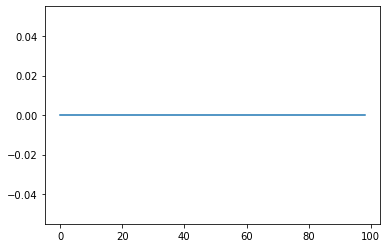

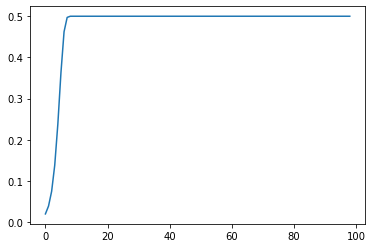

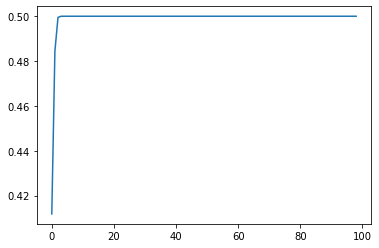

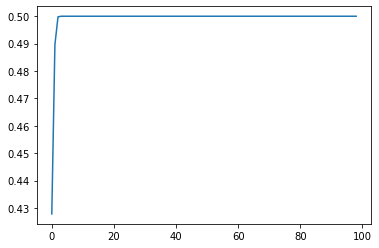

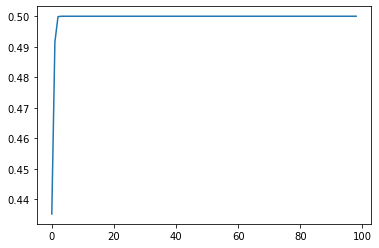

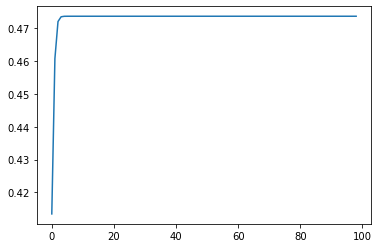

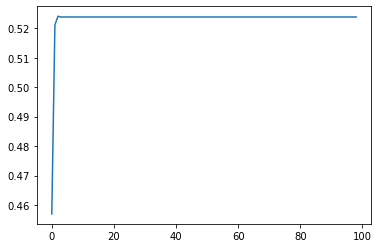

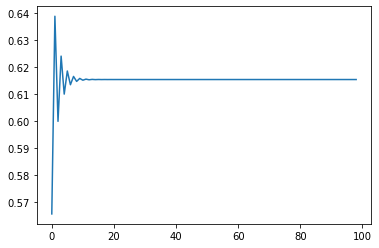

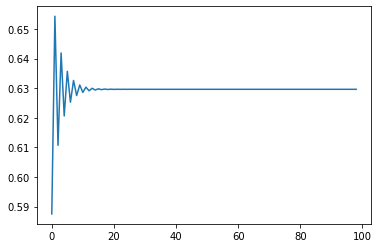

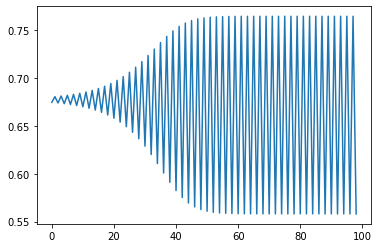

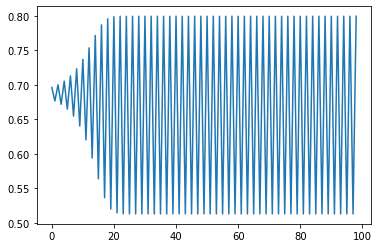

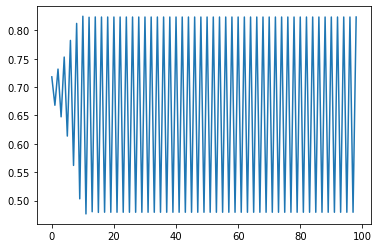

In [170]:
interact(slider,x=(0,1,0.01),r=(0,4,0.1))
#Te odio interact, no quiero 200000000 gráficas

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

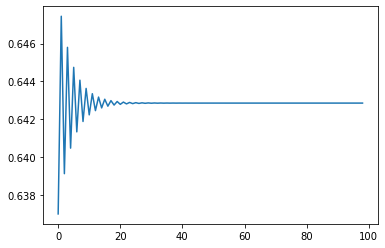

In [96]:
plt.plot(iterarLista(logistic_map,0.35,100,2.8)[1:])

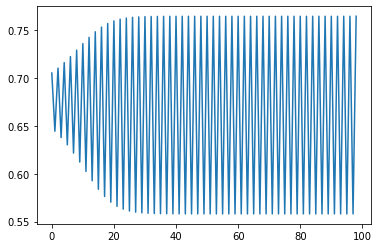

In [97]:
plt.plot(iterarLista(logistic_map,0.35,100,3.1)[1:])

Claramente escogió estos valores porque se encuentran cercanos al valor de r=3, donde cambian las condiciones de estabilidad.

Con los mismos valores de X0 y N, observamos que en r=2.8<3 la gráfica se estabiliza, mientras que para r=3.1>3 se vuelve loca

# Diagrama de Cobweb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

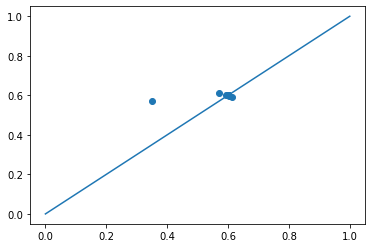

In [163]:
plt.scatter(iterarLista(logistic_map,0.35,1000,2.5),iterarLista(logistic_map,0.35,1001,2.5)[1:])
plt.plot(list(range(2)),list(range(2)))

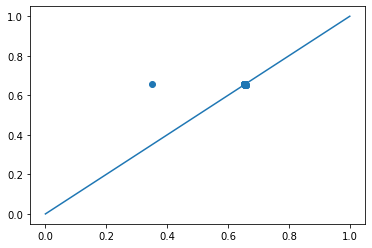

In [161]:
plt.scatter(iterarLista(logistic_map,0.35,1000,2.9),iterarLista(logistic_map,0.35,1001,2.9)[1:])
plt.plot(list(range(2)),list(range(2)))

Observamos que para valores de r menores a 3, las gráficas no son tan impresionantes, a pesar de tener muchas iteraciones

A continuación vemos que con r=3.1, la gráfica empieza a verse más dispersa

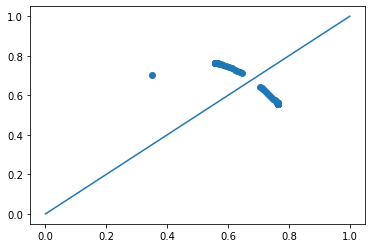

In [160]:
plt.scatter(iterarLista(logistic_map,0.35,1000,3.1),iterarLista(logistic_map,0.35,1001,3.1)[1:])
plt.plot(list(range(2)),list(range(2)))

Para r=4, vemos que empieza a adquirir una forma. Entre más iteraciones, más clara es la forma

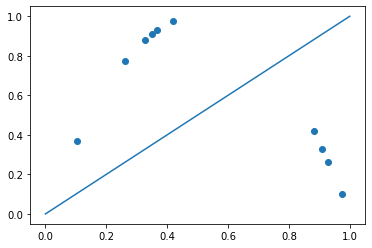

In [158]:
plt.scatter(iterarLista(logistic_map,0.35,10,4),iterarLista(logistic_map,0.35,11,4)[1:])
plt.plot(list(range(2)),list(range(2)))

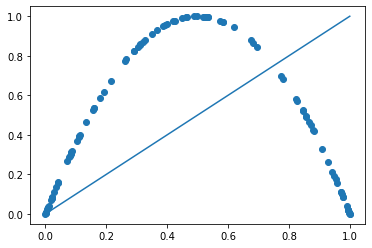

In [157]:
plt.scatter(iterarLista(logistic_map,0.35,100,4),iterarLista(logistic_map,0.35,101,4)[1:])
plt.plot(list(range(2)),list(range(2)))

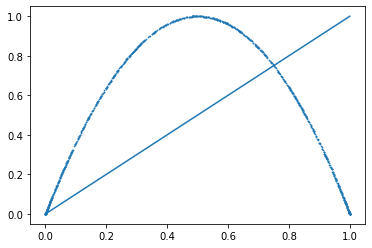

In [155]:
plt.scatter(iterarLista(logistic_map,0.35,1000,4),iterarLista(logistic_map,0.35,1001,4)[1:],0.5)
plt.plot(list(range(2)),list(range(2)))

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

In [147]:
puntos=iterarLista(logistic_map,0.35,101,4)

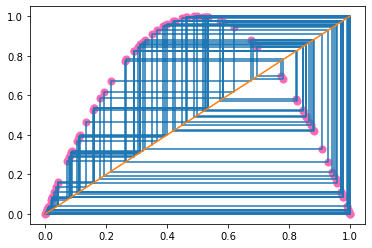

In [156]:
plt.scatter(puntos[:-1],puntos[1:],50,color='hotpink')
x=[]
y=[]
for i in range(len(puntos)):
    x.append(puntos[i])
    x.append(puntos[i])
for i in range(len(puntos)-1):
    y.append(puntos[i])
    y.append(puntos[i+1])
plt.plot(x[:-2],y)
plt.plot(list(range(2)),list(range(2)))

Se puede apreciar un sistema caótico, como esta tarea

# Diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

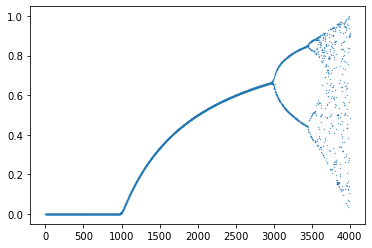

In [111]:
#Tomamos r=0 como r inicial
N=100
resultados=[]
r=0
while r<4:
    #Llamamos a iterar y appendeamos su n+1-ésimo valor para graficar
    n=iterar(logistic_map,random.random(),N+1,r)
    resultados.append(n)
    r+=0.001

plt.scatter(list(range(4001)),resultados,0.1)
#Queda rebonito

<div class="alert alert-info">
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

In [102]:
#definimos la función nueva
def mapeo(x,r):
    return 1-(r*(x**2))

In [112]:
#Tomamos r=0 como r inicial
N=100
resultados=[]
r=0
while r<4:
    #Llamamos a iterarLista y appendeamos su último valor para graficar
    n=iterar(mapeo,random.random(),N+1,r)
    resultados.append(n)
    r+=1

plt.scatter(list(range(401)),resultados,0.1)
#Observamos la diferencia de que no funciona y no sé por qué :(

OverflowError: (34, 'Numerical result out of range')